In [1]:
import cv2
import random
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
BASE_FILEPATH = './train/'
RANDOM_COUNT = 20
train_files = os.listdir('./train')
random_sample = random.sample(train_files,RANDOM_COUNT)

In [26]:
image = cv2.imread(BASE_FILEPATH+random_sample[19])

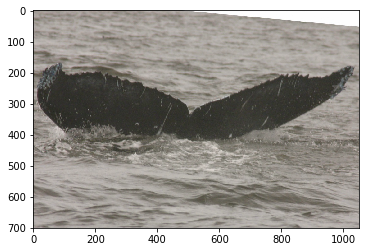

In [27]:
plt.imshow(image)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [29]:
# def cluster_it(image):
new_image = image.reshape(-1,3)
kmeans.fit(new_image) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
v = kmeans.labels_.reshape(image.shape[:2])

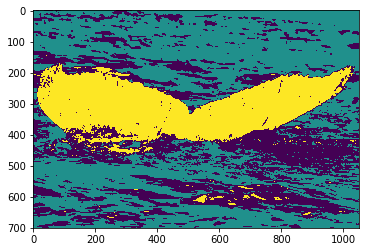

In [31]:
plt.imshow(v)

In [32]:
h,w = image.shape[:2]

In [33]:
SQ_SIZE = 5
z= np.zeros([h,w])
img = np.array(kmeans.cluster_centers_,dtype=np.uint8)
gray = cv2.cvtColor(np.expand_dims(img,axis=0), cv2.COLOR_BGR2GRAY)
i = np.argmin(gray.squeeze())
for y in range(0,h,SQ_SIZE):
    for x in range(0,w,SQ_SIZE):
        rect = v[y:y+SQ_SIZE,x:x+SQ_SIZE]
        if i in rect:
            z[y:y+SQ_SIZE,x:x+SQ_SIZE] = 1

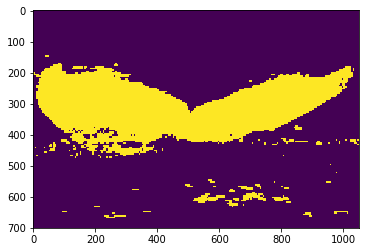

In [34]:
plt.imshow(z)

In [35]:
if 1 in z[0:20,0:20] :
    z = 1-z


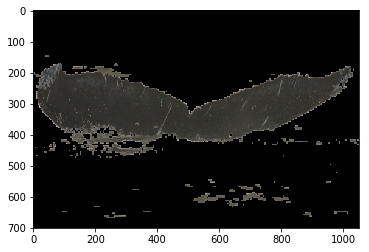

In [36]:
plt.imshow(cv2.bitwise_and(image,image,mask=z.astype('uint8')*255))

In [306]:
z.astype('uint8')*255

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
SQ_SIZE = 5


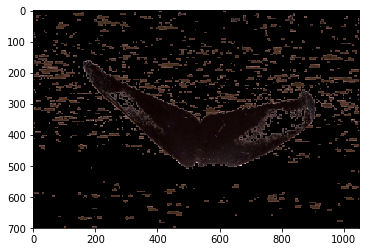

In [28]:
plt.imshow(grid_for_kmeans(image))

In [27]:
def grid_for_kmeans(image):
    new_image = image.reshape(-1,3)
    kmeans.fit(new_image) 
    h,w = image.shape[:2]
    z= np.zeros([h,w])
    img = np.array(kmeans.cluster_centers_,dtype=np.uint8)
    v = kmeans.labels_.reshape(image.shape[:2])
    gray = cv2.cvtColor(np.expand_dims(img,axis=0), cv2.COLOR_BGR2GRAY)
    i = np.argmin(gray.squeeze())
    for y in range(0,h,SQ_SIZE):
        for x in range(0,w,SQ_SIZE):
            rect = v[y:y+SQ_SIZE,x:x+SQ_SIZE]
            if i in rect:
                z[y:y+SQ_SIZE,x:x+SQ_SIZE] = 1
    if 1 in z[0:10,0:10]:
        z = 1-z
    return cv2.bitwise_and(image,image,mask=z.astype('uint8')*255)